## Dataset: McDonald's Store Reviews
* Source: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews

## Import Tools

In [1]:
!pip install tensorflow_text

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import urllib
url = "https://raw.githubusercontent.com/Jwizzed/ml-journey/main/myTool.py"
file_name = "myTool.py"
urllib.request.urlretrieve(url, file_name)

('myTool.py', <http.client.HTTPMessage at 0x7977fa0128f0>)

In [4]:
import myTool

In [5]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Get the data

In [6]:
# !kaggle datasets download -d nelgiriyewithana/mcdonalds-store-reviews

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# myTool.unzip("mcdonalds-store-reviews.zip")

In [9]:
!ls

drive  myTool.py  __pycache__  sample_data


In [10]:
data_df = pd.read_csv("/content/drive/MyDrive/Kaggle/McDonald_s_Reviews.csv", encoding='utf-8', encoding_errors='ignore')
data_df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [11]:
data_df.groupby("store_name").count()

,reviewer_id,category,store_address,latitude,longitude,rating_count,review_time,review,rating
store_name,,,,,,,,,
McDonald's,33396,33396,33396,32736,32736,33396,33396,33396,33396


### Become one with data

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [13]:
# Check na, in this case I won't drop na bc I won't using lat and long anyways.
data_df.isna().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [14]:
# Check it there is other store_name (Still McDonald)
data_df.store_name.unique()

array(["McDonald's"], dtype=object)

In [15]:
# Change the rating dtype to make sure if we are allow to ignore "ýýýMcDonald's"
data_df.rating = data_df.rating.apply(lambda x: int(x.split()[0]))
data_df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


In [16]:
data_df.describe()

,reviewer_id,latitude,longitude,rating
count,33396.000000,32736.000000,32736.000000,33396.000000
mean,16698.500000,34.442546,-90.647033,3.131363
std,9640.739131,5.344116,16.594844,1.615139
min,1.000000,25.790295,-121.995421,1.000000
25%,8349.750000,28.655350,-97.792874,1.000000
50%,16698.500000,33.931261,-81.471414,3.000000
75%,25047.250000,40.727401,-75.399919,5.000000
max,33396.000000,44.981410,-73.459820,5.000000


In [17]:
data_df.category.unique()

array(['Fast food restaurant'], dtype=object)

### Check if rating_count is independent variable

In [18]:
data_df.sort_values(by="rating_count").head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
853,854,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",a year ago,Salads are not sold there anymore and neither ...,3
1144,1145,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",4 years ago,"Never fails, always hits the spot lol",5
1143,1144,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",2 years ago,Always get orders wrong,1
1142,1143,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",a year ago,Very fast workers,5
1141,1142,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919,"1,028",4 years ago,Go ahead and get poisoned. I deffinently wont be.,1


In [19]:
data_df.sort_values(by="rating_count").tail()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
27434,27435,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,999,5 years ago,It's a pretty nice McDonald's. Not highest qua...,4
27433,27434,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,999,9 years ago,If I could give them no stars I would.. they h...,1
27432,27433,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,999,2 years ago,"Fast service, hot fries fresh burgers. It's Mc...",5
27446,27447,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,999,2 years ago,Crazy manager at this McDonald's abusing custo...,1
27440,27441,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,999,5 years ago,"Honestly, I hate to do this, but the moment I ...",1


In [20]:
data_df = data_df.loc[:, "review": ]
data_df.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was �����������...,5
4,"I repeat my order 3 times in the drive thru, a...",1


<Axes: ylabel='Frequency'>

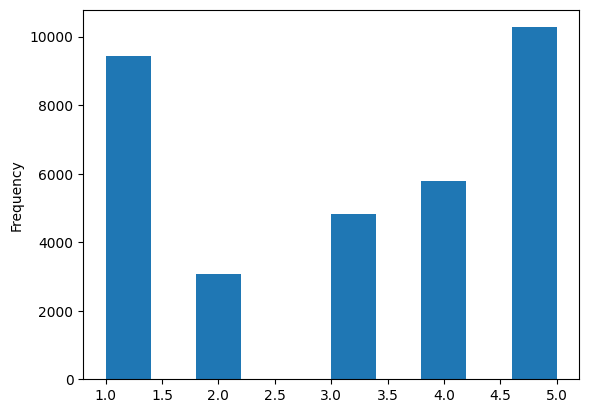

In [21]:
data_df.rating.plot.hist()

## Preprocess

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df.review,
                                                    data_df.rating,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26716,), (6680,), (26716,), (6680,))

### One-hot the rating

In [23]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_rating_one_hot = tf.one_hot(y_train, depth=5)
test_rating_one_hot = tf.one_hot(y_test, depth=5)
train_rating_one_hot.shape, test_rating_one_hot.shape

(TensorShape([26716, 5]), TensorShape([6680, 5]))

In [24]:
train_rating_one_hot[:10]

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

### Tokenization (word-level)

In [25]:
data_df[["review"]]

,review
0,Why does it look like someone spit on my food?...
1,It'd McDonalds. It is what it is as far as the...
2,Made a mobile order got to the speaker and che...
3,My mc. Crispy chicken sandwich was �����������...
4,"I repeat my order 3 times in the drive thru, a..."
...,...
33391,They treated me very badly.
33392,The service is very good
33393,To remove hunger is enough
33394,"It's good, but lately it has become very expen..."


In [26]:
max_vocab_length = 10000
max_length = round(sum([len(sentence) for sentence in X_train]) / len(X_train))
max_length

121

In [27]:
review_token = tf.keras.layers.TextVectorization(
                max_tokens=max_vocab_length,
                standardize='lower_and_strip_punctuation',
                split='whitespace',
                output_sequence_length=max_length,
                encoding='latin-1',
            )
review_token.adapt(X_train)
review_token

### Embedding (word-level)

In [28]:
review_embedding = tf.keras.layers.Embedding(
                max_vocab_length,
                output_dim=128,
                mask_zero=False,
                input_length=max_length,
            )
review_embedding

### Turn into tf.data

In [29]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, train_rating_one_hot))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, test_rating_one_hot))

train_ds = train_ds.batch(16).cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(16).cache().prefetch(tf.data.AUTOTUNE)

train_ds.element_spec, test_ds.element_spec

((TensorSpec(shape=(None,), dtype=tf.string, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None,), dtype=tf.string, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

## Model

### Model 0: Baseline

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
history_0 = model_0.fit(X_train, y_train)

In [31]:
y_pred_0 = model_0.predict(X_test)
myTool.evaluate_preds(y_test, y_pred_0)

{'mae': 0.7188623,
 'mse': 1.7841318,
 'rmse': 1.335714,
 'mape': 23.846062,
 'mase': 0.40323183}

### Model 1: Dense Model

In [32]:
inputs = tf.keras.layers.Input(shape=(), dtype="string")
x = review_token(inputs)
x = review_embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [33]:
model_1_history = model_1.fit(train_ds,
                              epochs=5,
                              batch_size=32,
                              validation_data=test_ds)


Epoch 1/5
1670/1670 [==============================] - 59s 34ms/step - loss: 0.8818 - accuracy: 0.3039 - val_loss: 0.8411 - val_accuracy: 0.3338
Epoch 2/5
1670/1670 [==============================] - 38s 23ms/step - loss: 0.8456 - accuracy: 0.3203 - val_loss: 0.8332 - val_accuracy: 0.3257
Epoch 3/5
1670/1670 [==============================] - 34s 21ms/step - loss: 0.8389 - accuracy: 0.3263 - val_loss: 0.8209 - val_accuracy: 0.3350
Epoch 4/5
1670/1670 [==============================] - 37s 22ms/step - loss: 0.8362 - accuracy: 0.3244 - val_loss: 0.8108 - val_accuracy: 0.3500
Epoch 5/5
1670/1670 [==============================] - 38s 23ms/step - loss: 0.8348 - accuracy: 0.3231 - val_loss: 0.8043 - val_accuracy: 0.4048


In [34]:
y_prob_1 = model_1.predict(X_test)
y_pred_1 = y_prob_1.argmax(axis=1)
y_pred_1

209/209 [==============================] - 1s 5ms/step


array([1, 3, 1, ..., 1, 1, 1])

In [35]:
myTool.evaluate_preds(y_test, y_pred_1)

{'mae': 1.2474551,
 'mse': 3.2986526,
 'rmse': 1.8162193,
 'mape': 33.882744,
 'mase': 0.6997357}

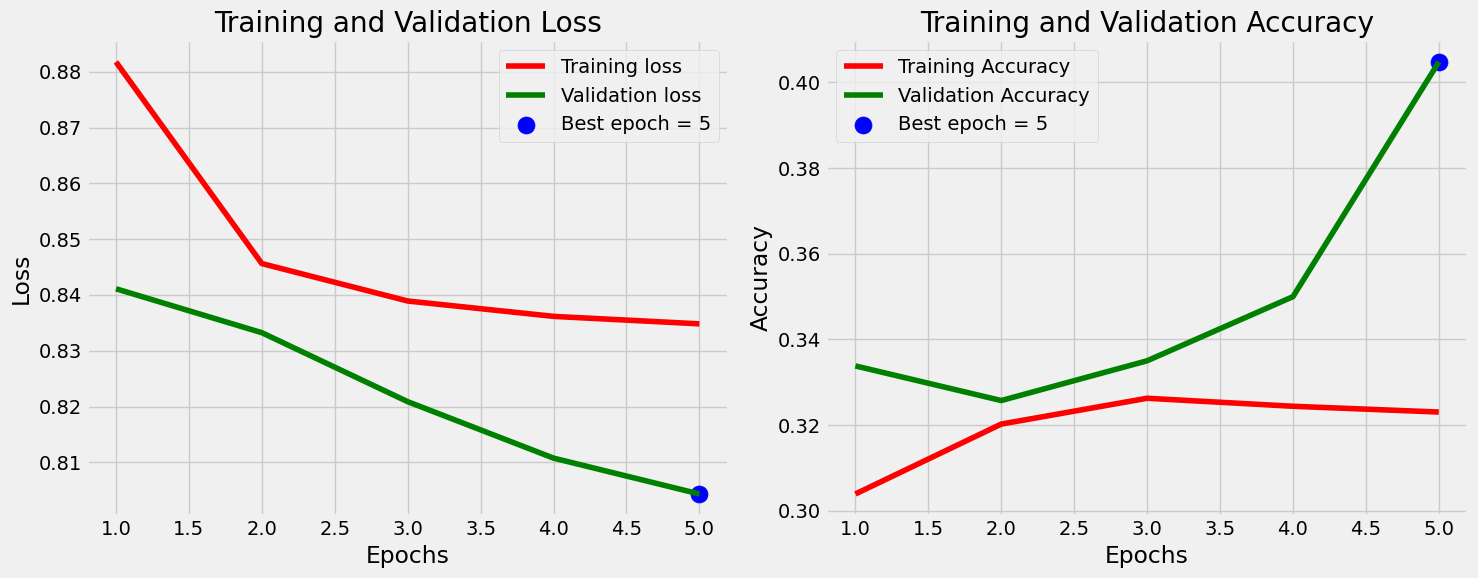

In [36]:
myTool.history_plot(model_1_history)

In [37]:
myTool.compare_results_df(y_pred_0, y_pred_1, y_test)

,Old,New,Diff
accuracy,62.455090,40.479042,-21.9760
precision,0.686300,0.244466,-0.4418
recall,0.624551,0.404790,-0.2198
f1,0.568775,0.297042,-0.2717


### Model 2: LSTM model (RNN)

In [38]:
inputs = tf.keras.layers.Input(shape=(), dtype="string")
x = review_token(inputs)
x = review_embedding(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(5, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

model_2_history = model_2.fit(train_ds,
                              epochs=5,
                              validation_data=test_ds)

Epoch 1/5
1670/1670 [==============================] - 324s 192ms/step - loss: 0.9986 - accuracy: 0.2367 - val_loss: 1.1273 - val_accuracy: 0.1406
Epoch 2/5
1381/1670 [=======================>......] - ETA: 53s - loss: 1.1233 - accuracy: 0.2133

KeyboardInterrupt: ignored

In [ ]:
y_prob_2 = model_2.predict(X_test)
y_pred_2 = y_prob_2.argmax(axis=1)
y_pred_2

In [ ]:
myTool.evaluate_preds(y_test, y_pred_2)

In [ ]:
myTool.compare_results_df(y_pred_0, y_pred_2, y_test)

Just skip RNN model..

### Model 3: 1D Convolutional Neural Network

In [ ]:
from tensorflow.keras import layers
inputs = tf.keras.layers.Input(shape=(), dtype="string")
x = review_token(inputs)
x = review_embedding(x)
x = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_Conv1D")

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

model_3_history = model_3.fit(train_ds,
                              epochs=5,
                              validation_data=test_ds)

In [ ]:
y_prob_3 = model_3.predict(X_test)
y_pred_3 = y_prob_3.argmax(axis=1)
y_pred_3

skip this one too..

In [ ]:
myTool.evaluate_preds(y_test, y_pred_3)

In [ ]:
myTool.compare_results_df(y_pred_0, y_pred_3, y_test)

### Model 4: BERT

In [ ]:
import tensorflow_text as tf_text
import tensorflow_hub as hub

In [ ]:
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2",trainable=False)

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocess = preprocessor(text_input)
encoder = encoder(preprocess)

x = tf.keras.layers.Dropout(0.1,name='dropout')(encoder['pooled_output'])
x = tf.keras.layers.Dense(5,activation='softmax',name='output')(x)

model_4 = tf.keras.Model(text_input, x, name="BERT")

model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


In [ ]:
model_4_history = model_4.fit(train_ds,
                              steps_per_epoch=len(train_ds),
                              epochs=5,
                              validation_data=test_ds,
                              validation_steps=len(test_ds))

In [ ]:
y_prob_4 = model_4.predict(X_test)
y_pred_4 = y_prob_4.argmax(axis=1)
y_pred_4

In [ ]:
myTool.evaluate_preds(y_test, y_pred_4)

In [ ]:
myTool.compare_results_df(y_pred_0, y_pred_4, y_test)

In [ ]:
myTool.history_plot(model_4_history)

### Model 5: DistilBert



In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocessor = hub.KerasLayer("https://tfhub.dev/jeongukjae/distilbert_en_cased_preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/distilbert_en_cased_L-6_H-768_A-12/1", trainable=False)


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
encoder_inputs = preprocessor(text_input)
encoder_outputs = encoder(encoder_inputs)
pooled_output = encoder_outputs["pooled_output"]
sequence_output = encoder_outputs["sequence_output"]

# x = tf.keras.layers.Dropout(0.1, name='dropout')(pooled_output)
outputs = tf.keras.layers.Dense(5, activation='softmax')(pooled_output)
model_5 = tf.keras.Model(text_input, outputs)

model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


In [ ]:
model_5_history = model_5.fit(train_ds,
                              steps_per_epoch=0.1 *len(train_ds),
                              epochs=3,
                              validation_data=test_ds,
                              validation_steps=len(test_ds))


In [ ]:
model_5.summary()

In [ ]:
myTool.history_plot(model_5_history)